In [77]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from fredapi import Fred
import plotly.express as px
import time 
import os

### Adding styles to the plots that are going to be created

In [78]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

### Loading the env file where the API key is stored 

In [79]:

load_dotenv("hello.env")
fred_key = os.getenv("API_Key")

### Creating the Fred object 

In [80]:
fred = Fred(api_key=fred_key)


### Searching for economic data

In [81]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head(5)

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-12-30   2024-12-30   
CSUSHPINSA          CSUSHPINSA     2024-12-30   2024-12-30   
SP500                    SP500     2024-12-30   2024-12-30   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-12-30   2024-12-30   
BAMLC0A0CM          BAMLC0A0CM     2024-12-30   2024-12-30   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-12-27  Daily, Close   
CSUSHPINSA            1987-01-01      2024-09-01       Monthly   
SP500                 2014-12-31      2024-12-30  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2024-12-27  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-12-27  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2024-12-30 08:37:09-06:00         92   
CSUSHPINSA      2024-11-26 08:12:02-06:00         88   
SP500           2024-12-30 19:12:09-06:00         83   
BAMLH0A0HYM2EY  2024-12-30 08:37:12-06:00         82   
BAMLC0A0CM      2024-12-30 08:45:01-06:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

### 3 Now Pulling raw data and ploting graphs 

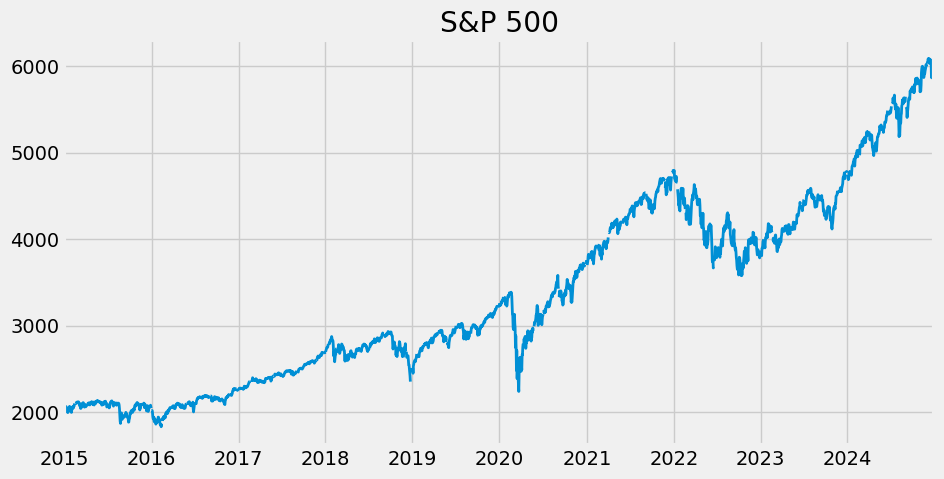

In [82]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

### Pulling and joining multiple data series 

In [83]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [84]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [85]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [86]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [87]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 9, 1, 0, 0),
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0)], shape=(585,), dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.3, 5.4, 5.4], shape=(585,)),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 9, 1, 0, 0),
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0)], shape=(585,), dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4.1, 4.2], shape=(585,)),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 9, 1, 0, 0),
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0)], shape=(585,), dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.4,  4.4,  4.4], shape=(585,)),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2024, 9, 1, 0, 0),
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0)], shape=(585,), dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.3, 3.3, 3.4], shape=(585,)),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Pennsylvania<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Pennsylvania',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
     

### Pulling April 2020 Unemployment Rate Per State

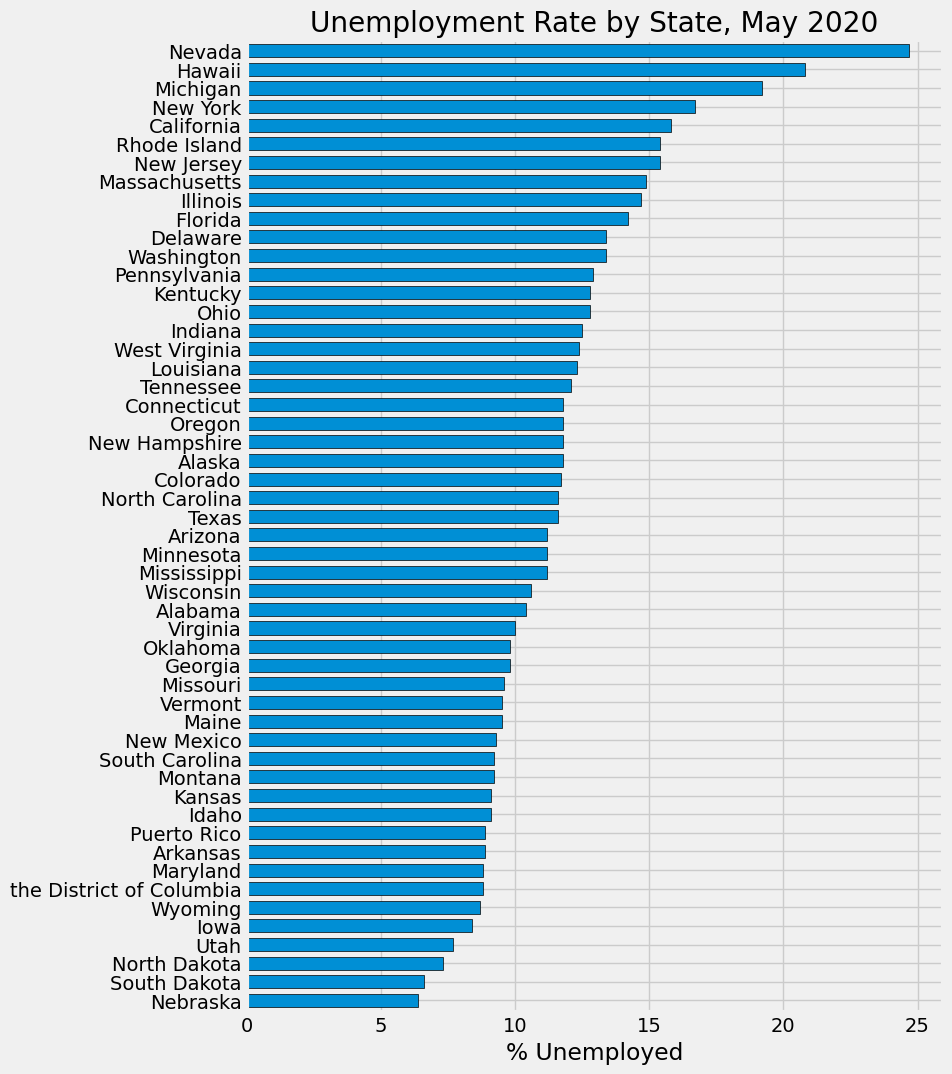

In [88]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

### Pulling participation rate

In [89]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [90]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

### Plotting Uemployement vs Participation for each state!!

In [91]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

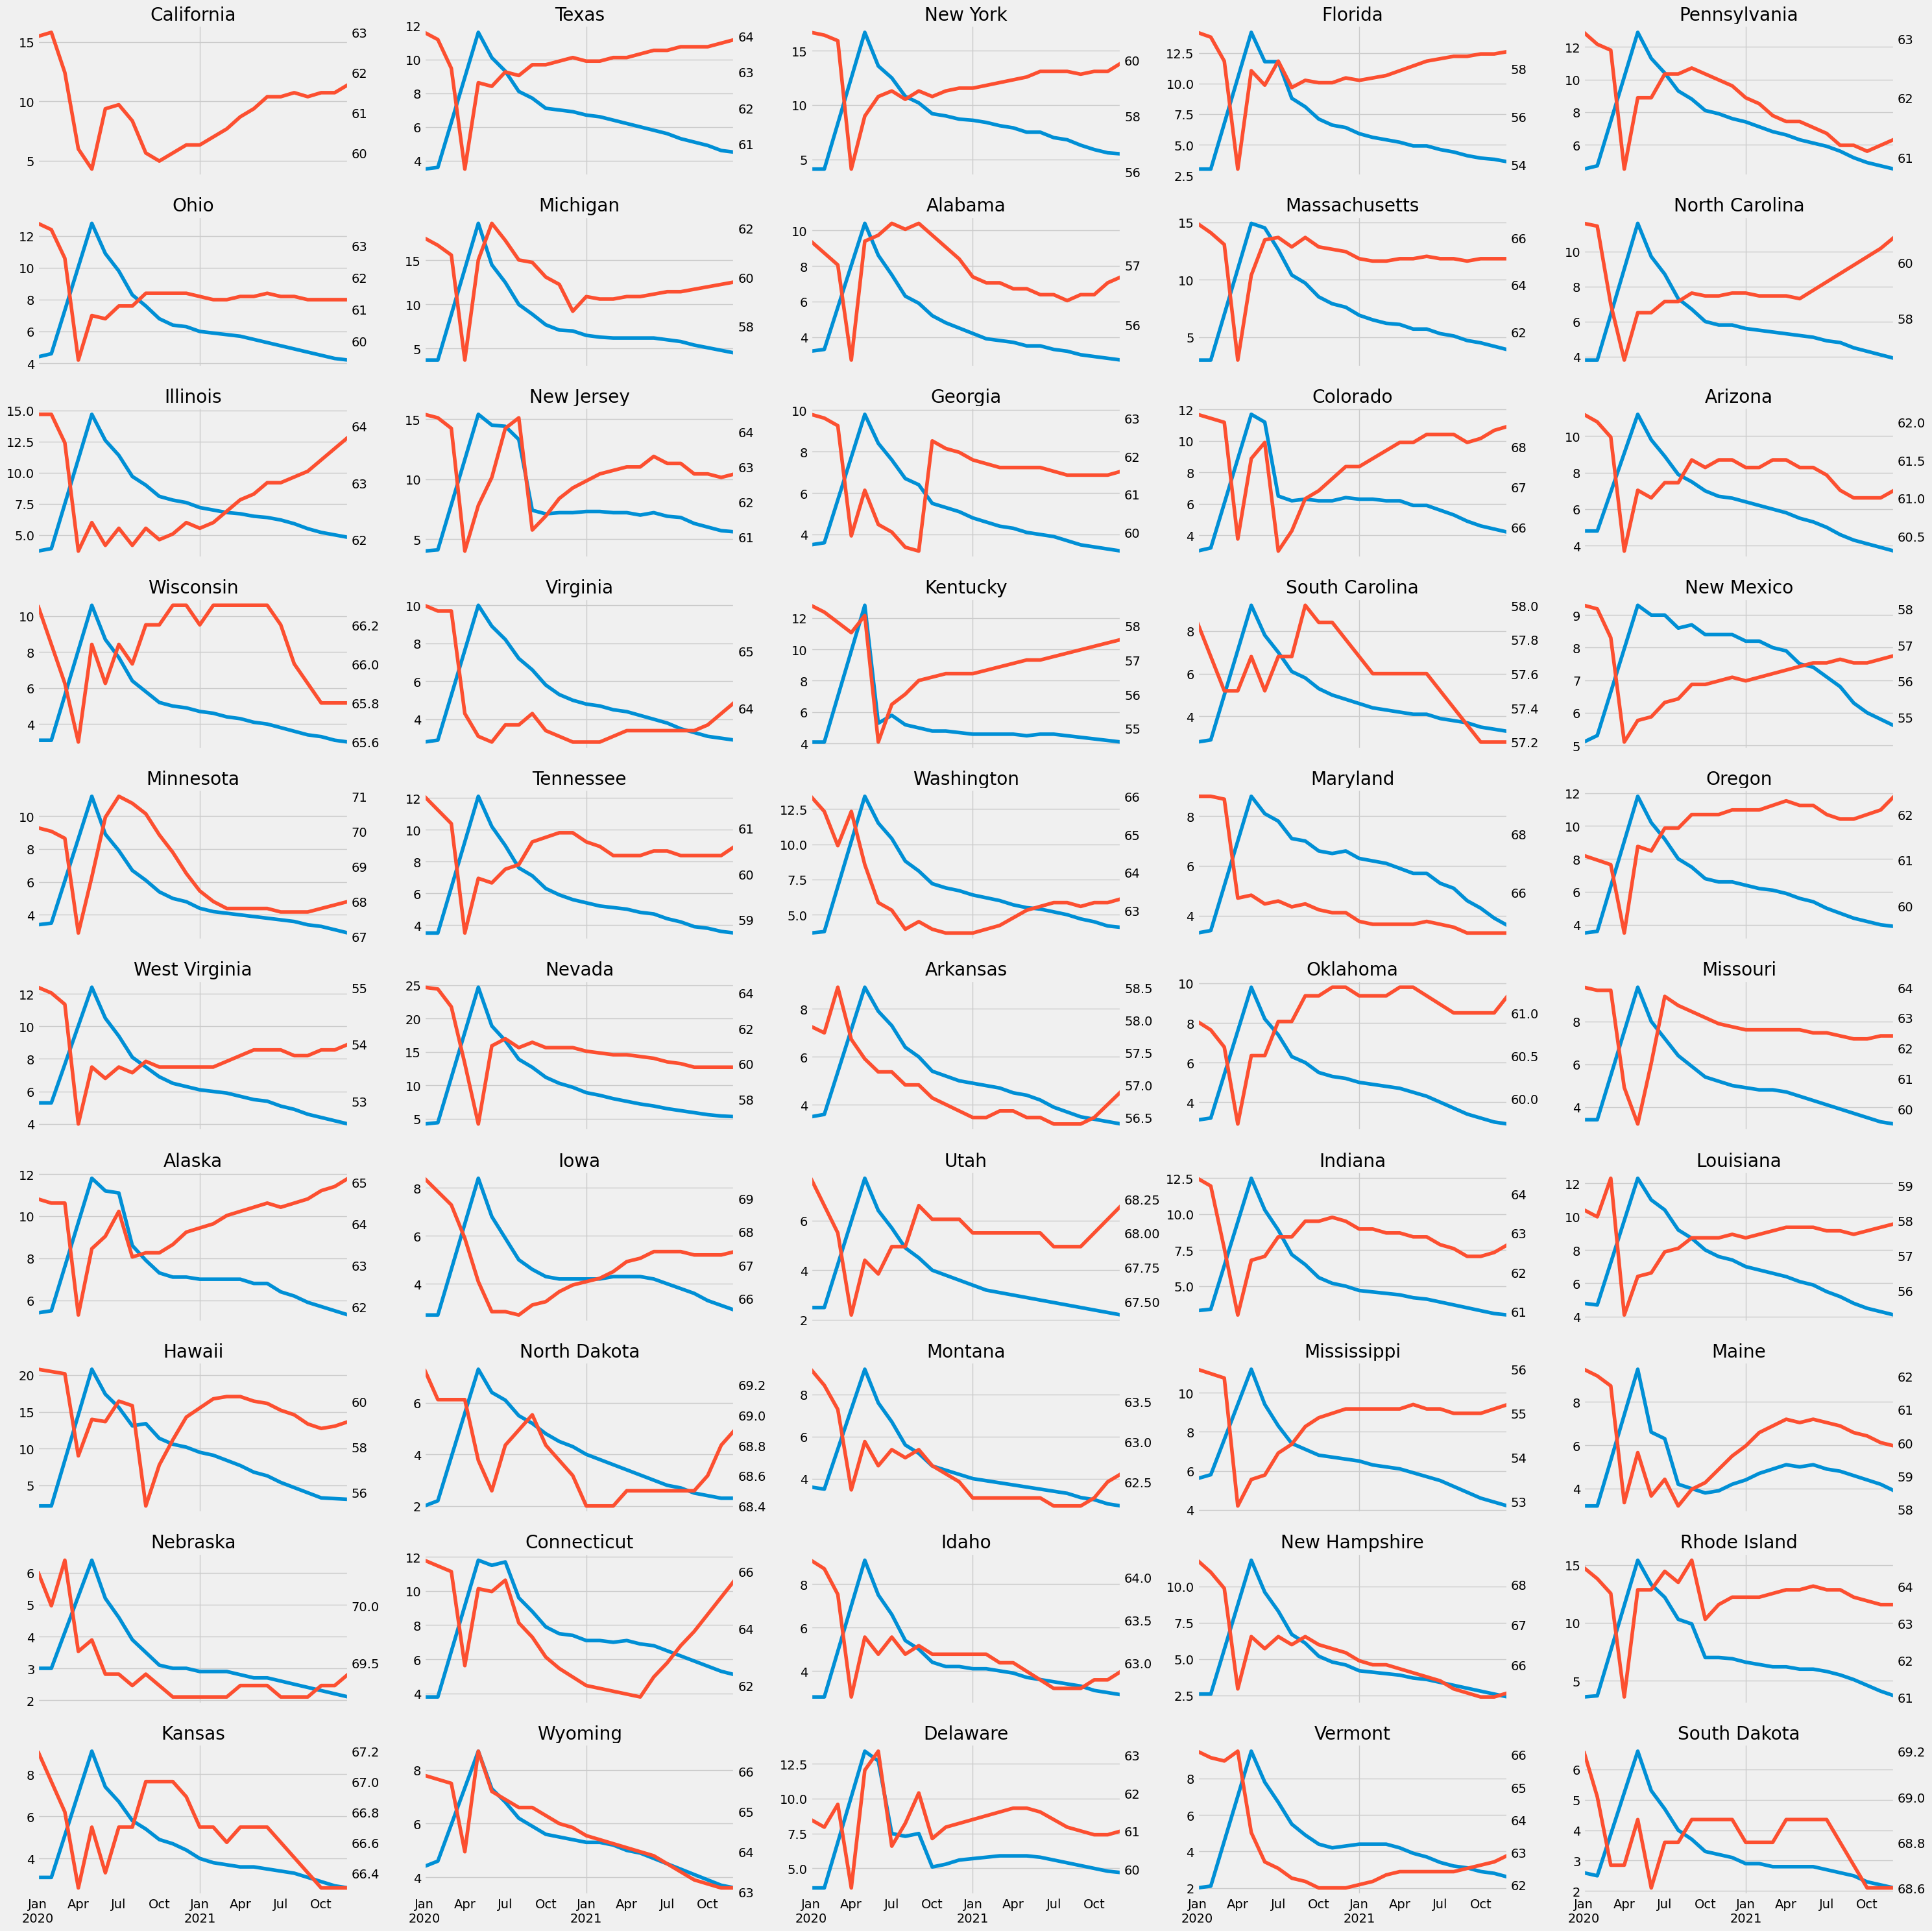

In [92]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

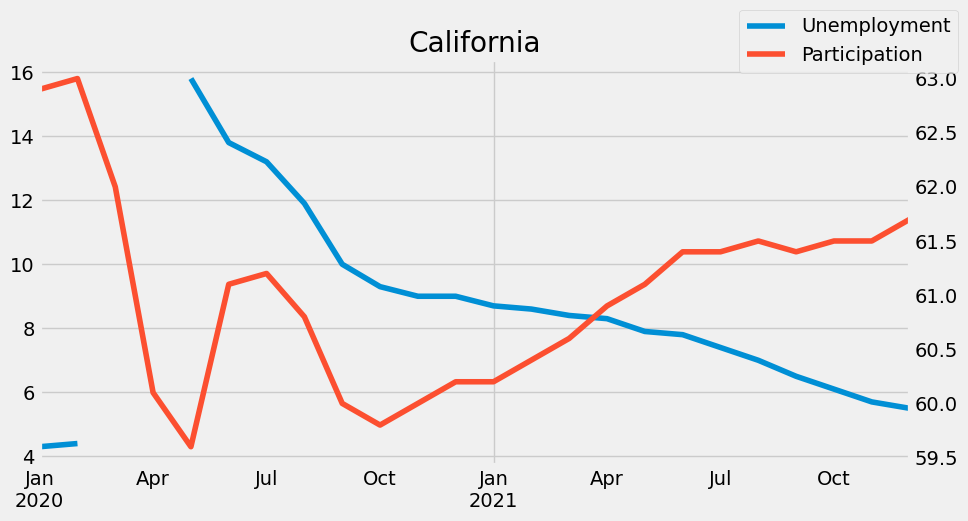

In [93]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()